In [ ]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt

from data.load_csv import tournament_df, bout_df, fencer_bio_df, fencer_rankings_df

## Count Properties

#### number of upsets vs total bouts


In [153]:
bout_df[bout_df['upset'] == True].shape[0]

9250

In [32]:
overall_upset_ratio = bout_df[bout_df['upset'] == True].shape[0]/bout_df.shape[0]
print("Overall percentage of Upset bouts: {:.2%}".format(overall_upset_ratio))

Overall percentage of Upset bouts: 18.83%


#### number of lefties/righties 

In [33]:
fencer_bio_df[fencer_bio_df['hand'] == 'Left'].shape[0]

360

In [34]:
fencer_bio_df[fencer_bio_df['hand'] == 'Right'].shape[0]

1760

In [37]:
total_handed = fencer_bio_df[(fencer_bio_df['hand'] == 'Left') | (fencer_bio_df['hand'] == 'Right')].shape[0]
overall_lefty_ratio = fencer_bio_df[fencer_bio_df['hand'] == 'Left'].shape[0] / total_handed
print("Overall percentage of left-handed fencerss: {:.2%}".format(overall_lefty_ratio))

Overall percentage of left-handed fencerss: 16.98%


#### upset ratio per fencer 

In [86]:
def get_fencer_upset_nums(fencer_id):
    fencer_bouts = bout_df[(bout_df['fencer_ID'] == fencer_id) | (bout_df['opp_ID'] == fencer_id)] 
    wins = fencer_bouts[fencer_bouts['winner_ID'] == fencer_id]
    losses = fencer_bouts[fencer_bouts['winner_ID'] != fencer_id]
    upset_wins       = wins[wins['upset'] == True].shape[0]
    non_upset_wins   = wins[wins['upset'] == False].shape[0]
    upset_losses     = losses[losses['upset'] == True].shape[0]
    non_upset_losses = losses[losses['upset'] == False].shape[0]
#     print("total bout count: {}".format(fencer_bouts.shape[0]))
#     print("upset_wins:       {}".format(upset_wins))
#     print("non_upset_wins:   {}".format(non_upset_wins))
#     print("upset_losses:     {}".format(upset_losses))
#     print("non_upset_losses: {}".format(non_upset_losses))
    return upset_wins, non_upset_wins, upset_losses, non_upset_losses
    
test_id = 28761
print(get_fencer_upset_nums(test_id))

(21, 12, 7, 53)


In [90]:
fencer_ID_list = list(set(list(np.unique(bout_df['fencer_ID'])) + list(np.unique(bout_df['opp_ID']))))

upset_data = []
for fencer_id in fencer_ID_list:
    upset_wins, non_upset_wins, upset_losses, non_upset_losses = get_fencer_upset_nums(fencer_id)
    total = upset_wins + non_upset_wins + upset_losses + non_upset_losses
    upset_data.append([fencer_id, total, upset_wins, non_upset_wins, upset_losses, non_upset_losses])

upset_df = pd.DataFrame(data=upset_data, columns = ['id', 'total bouts', 'upset_wins', 'non_upset_wins', 'upset_losses', 'non_upset_losses'])
upset_df.head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
0  49157            6           0               1             0   
1  16392          112           5              80            22   
2  40975          123           3              33             0   
3  16404           12           1               1             0   
4  24606            6           1               2             0   

   non_upset_losses  
0                 5  
1                 5  
2                87  
3                10  
4                 3

In [94]:
upset_df['total_wins'] = upset_df['upset_wins'] + upset_df['non_upset_wins']
upset_df['total_losses'] = upset_df['upset_losses'] + upset_df['non_upset_losses']

upset_df.head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
0  49157            6           0               1             0   
1  16392          112           5              80            22   
2  40975          123           3              33             0   
3  16404           12           1               1             0   
4  24606            6           1               2             0   

   non_upset_losses  total_wins  total_losses  
0                 5           1             5  
1                 5          85            27  
2                87          36            87  
3                10           2            10  
4                 3           3             3

In [96]:
upset_df['upset_wins_ratio'] = upset_df['upset_wins'] / upset_df['total_wins']
upset_df['upset_losses_ratio'] = upset_df['upset_losses'] / upset_df['total_losses']

upset_df.head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
0  49157            6           0               1             0   
1  16392          112           5              80            22   
2  40975          123           3              33             0   
3  16404           12           1               1             0   
4  24606            6           1               2             0   

   non_upset_losses  total_wins  total_losses  upset_wins_ratio  \
0                 5           1             5          0.000000   
1                 5          85            27          0.058824   
2                87          36            87          0.083333   
3                10           2            10          0.500000   
4                 3           3             3          0.333333   

   upset_losses_ratio  
0            0.000000  
1            0.814815  
2            0.000000  
3            0.000000  
4            0.000000

In [98]:
upset_df.sort_values(by=['total bouts'], ascending=False).head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
1432  29852          440          41             181           101   
1249  20938          413          22             246            88   
1528  30327          381          19             265            67   
424   34549          369          29             135            65   
645   18774          368          39             196            83   

      non_upset_losses  total_wins  total_losses  upset_wins_ratio  \
1432               117         222           218          0.184685   
1249                57         268           145          0.082090   
1528                30         284            97          0.066901   
424                140         164           205          0.176829   
645                 50         235           133          0.165957   

      upset_losses_ratio  
1432            0.463303  
1249            0.606897  
1528            0.690722  
424             0.317073  
645             0.624060

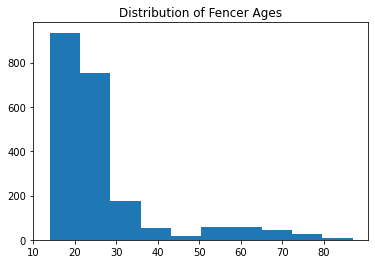

In [139]:
## Age distribution 
fig, ax = plt.subplots()
x = fencer_bio_df['age'].astype(int)
ax.hist(x)
plt.xticks(range(10, int(max(x))+1, 10))
ax.set_title("Distribution of Fencer Ages")
plt.show()

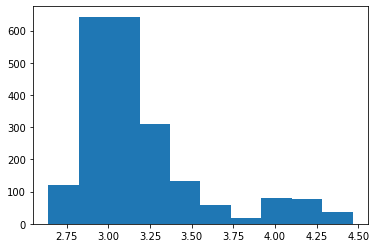

In [141]:
fig, ax = plt.subplots()
ax.hist(fencer_bio_df['age'].astype(int).map(math.log))
plt.show()

In [143]:
## Nationality
len(list(np.unique(fencer_bio_df['country'])))

103

In [149]:
fencer_bio_df.groupby('country').count().sort_values(by=['id'],ascending=False)


id  name  country_code  hand  age  url  date_accessed
country                                                                  
USA                133   133           133   133  133  133            133
ITALY              130   130           130   130  130  130            130
GERMANY            114   114           114   114  114  114            114
FRANCE              88    88            88    88   88   88             88
GREAT BRITAIN       87    87            87    87   87   87             87
...                ...   ...           ...   ...  ...  ...            ...
AS                   1     1             1     1    1    1              1
BS                   1     1             1     1    1    1              1
BRUNEI DARUSSALAM    1     1             1     1    1    1              1
SAUDI ARABIA         1     1             1     1    1    1              1
TESTING              1     1             1     1    1    1              1

[103 rows x 7 columns]

In [151]:
# poorly loaded country code! Need to fix in cache... 
fencer_bio_df[fencer_bio_df['country'] == 'TESTING']

id                name country_code  country   hand age  \
659  8941  LANGTON Marguerite          TST  TESTING  Right  75   

                               url        date_accessed  
659  https://fie.org/athletes/8941  2021-05-11 18:03:41

In [160]:
# these fencer's countries don't have a country code value in the dict? or the country label is the country code? 
fencer_bio_df[fencer_bio_df['country'].apply(lambda x: len(x)<3)]#.groupby('country_code').count()['id']

id                          name country_code country   hand age  \
408   47552                AUNG Phyu Phyu           MM      MM  Right  24   
409   47553                    SOE Nan Ei           MM      MM  Right  19   
1373  51548     MEJIA LOPEZ Angie Fabiola           HN      HN  Right  16   
1772  39056   LOPEZ FLORES Kateryn Gissel           HN      HN  Right  24   
1807  40178             ALBUAINAIN Sumaya           BH      BH  Right  19   
1808  40179                      ALI Muna           BH      BH  Right  24   
1809  40180                 FARDEEN Layla           BH      BH  Right  19   
1810  40181                 MOHAMED Maram           BH      BH  Right  19   
1915  46850                   LIANG Jenny           AS      AS  Right  18   
2034  41583                   CLARE Alana           BS      BS  Right  26   
2049  35497  ABEYNAYAKA Ashoka Udayangani           LK      LK  Right  32   
2093  44401               PRAKASHAM Reeta           LK      LK  Right  29   

                                 url        date_accessed  
408   https://fie.org/athletes/47552  2021-05-11 12:56:52  
409   https://fie.org/athletes/47553  2021-05-11 12:56:54  
1373  https://fie.org/athletes/51548  2021-05-12 13:37:34  
1772  https://fie.org/athletes/39056  2021-05-12 14:11:25  
1807  https://fie.org/athletes/40178  2021-05-12 14:12:55  
1808  https://fie.org/athletes/40179  2021-05-12 14:13:01  
1809  https://fie.org/athletes/40180  2021-05-12 14:13:04  
1810  https://fie.org/athletes/40181  2021-05-12 14:13:10  
1915  https://fie.org/athletes/46850  2021-05-12 14:25:15  
2034  https://fie.org/athletes/41583  2021-05-12 15:50:29  
2049  https://fie.org/athletes/35497  2021-05-12 15:51:07  
2093  https://fie.org/athletes/44401  2021-05-12 15:53:05

## Points Predictions

Based on points at the time of event, predicting the higher points to win (and 50-50 for unranked) probably has an expected accuracy of 82% (the 50-50 may be off, so could be worse than that).

## Bout Frequency 

In [214]:
fencer_ID_list = list(set(list(np.unique(bout_df['fencer_ID'])) + list(np.unique(bout_df['opp_ID']))))
bout_count = np.zeros((len(fencer_ID_list),len(fencer_ID_list)))
for row in range(0, bout_df.shape[0]):
    id1 = bout_df.iloc[row]['fencer_ID']
    idx1 = fencer_ID_list.index(id1) 
    id2 = bout_df.iloc[row]['opp_ID']
    idx2 = fencer_ID_list.index(id2) 

    bout_count[idx1][idx2] += 1
    bout_count[idx2][idx1] += 1

In [189]:
bout_count.sum() # = 2* bout_df.shape[0]

98262.0

In [213]:
bout_df.shape[0]

49131

In [215]:
np.count_nonzero(bout_count) #represent instances where we have bout data between the two fencers 

84114

In [217]:
bout_count.size - np.count_nonzero(bout_count)

4359550

In [262]:
print("Percentage of pairs where we have data: {:.2%}".format(np.count_nonzero(bout_count) / bout_count.size))

Percentage of pairs where we have data: 1.89%


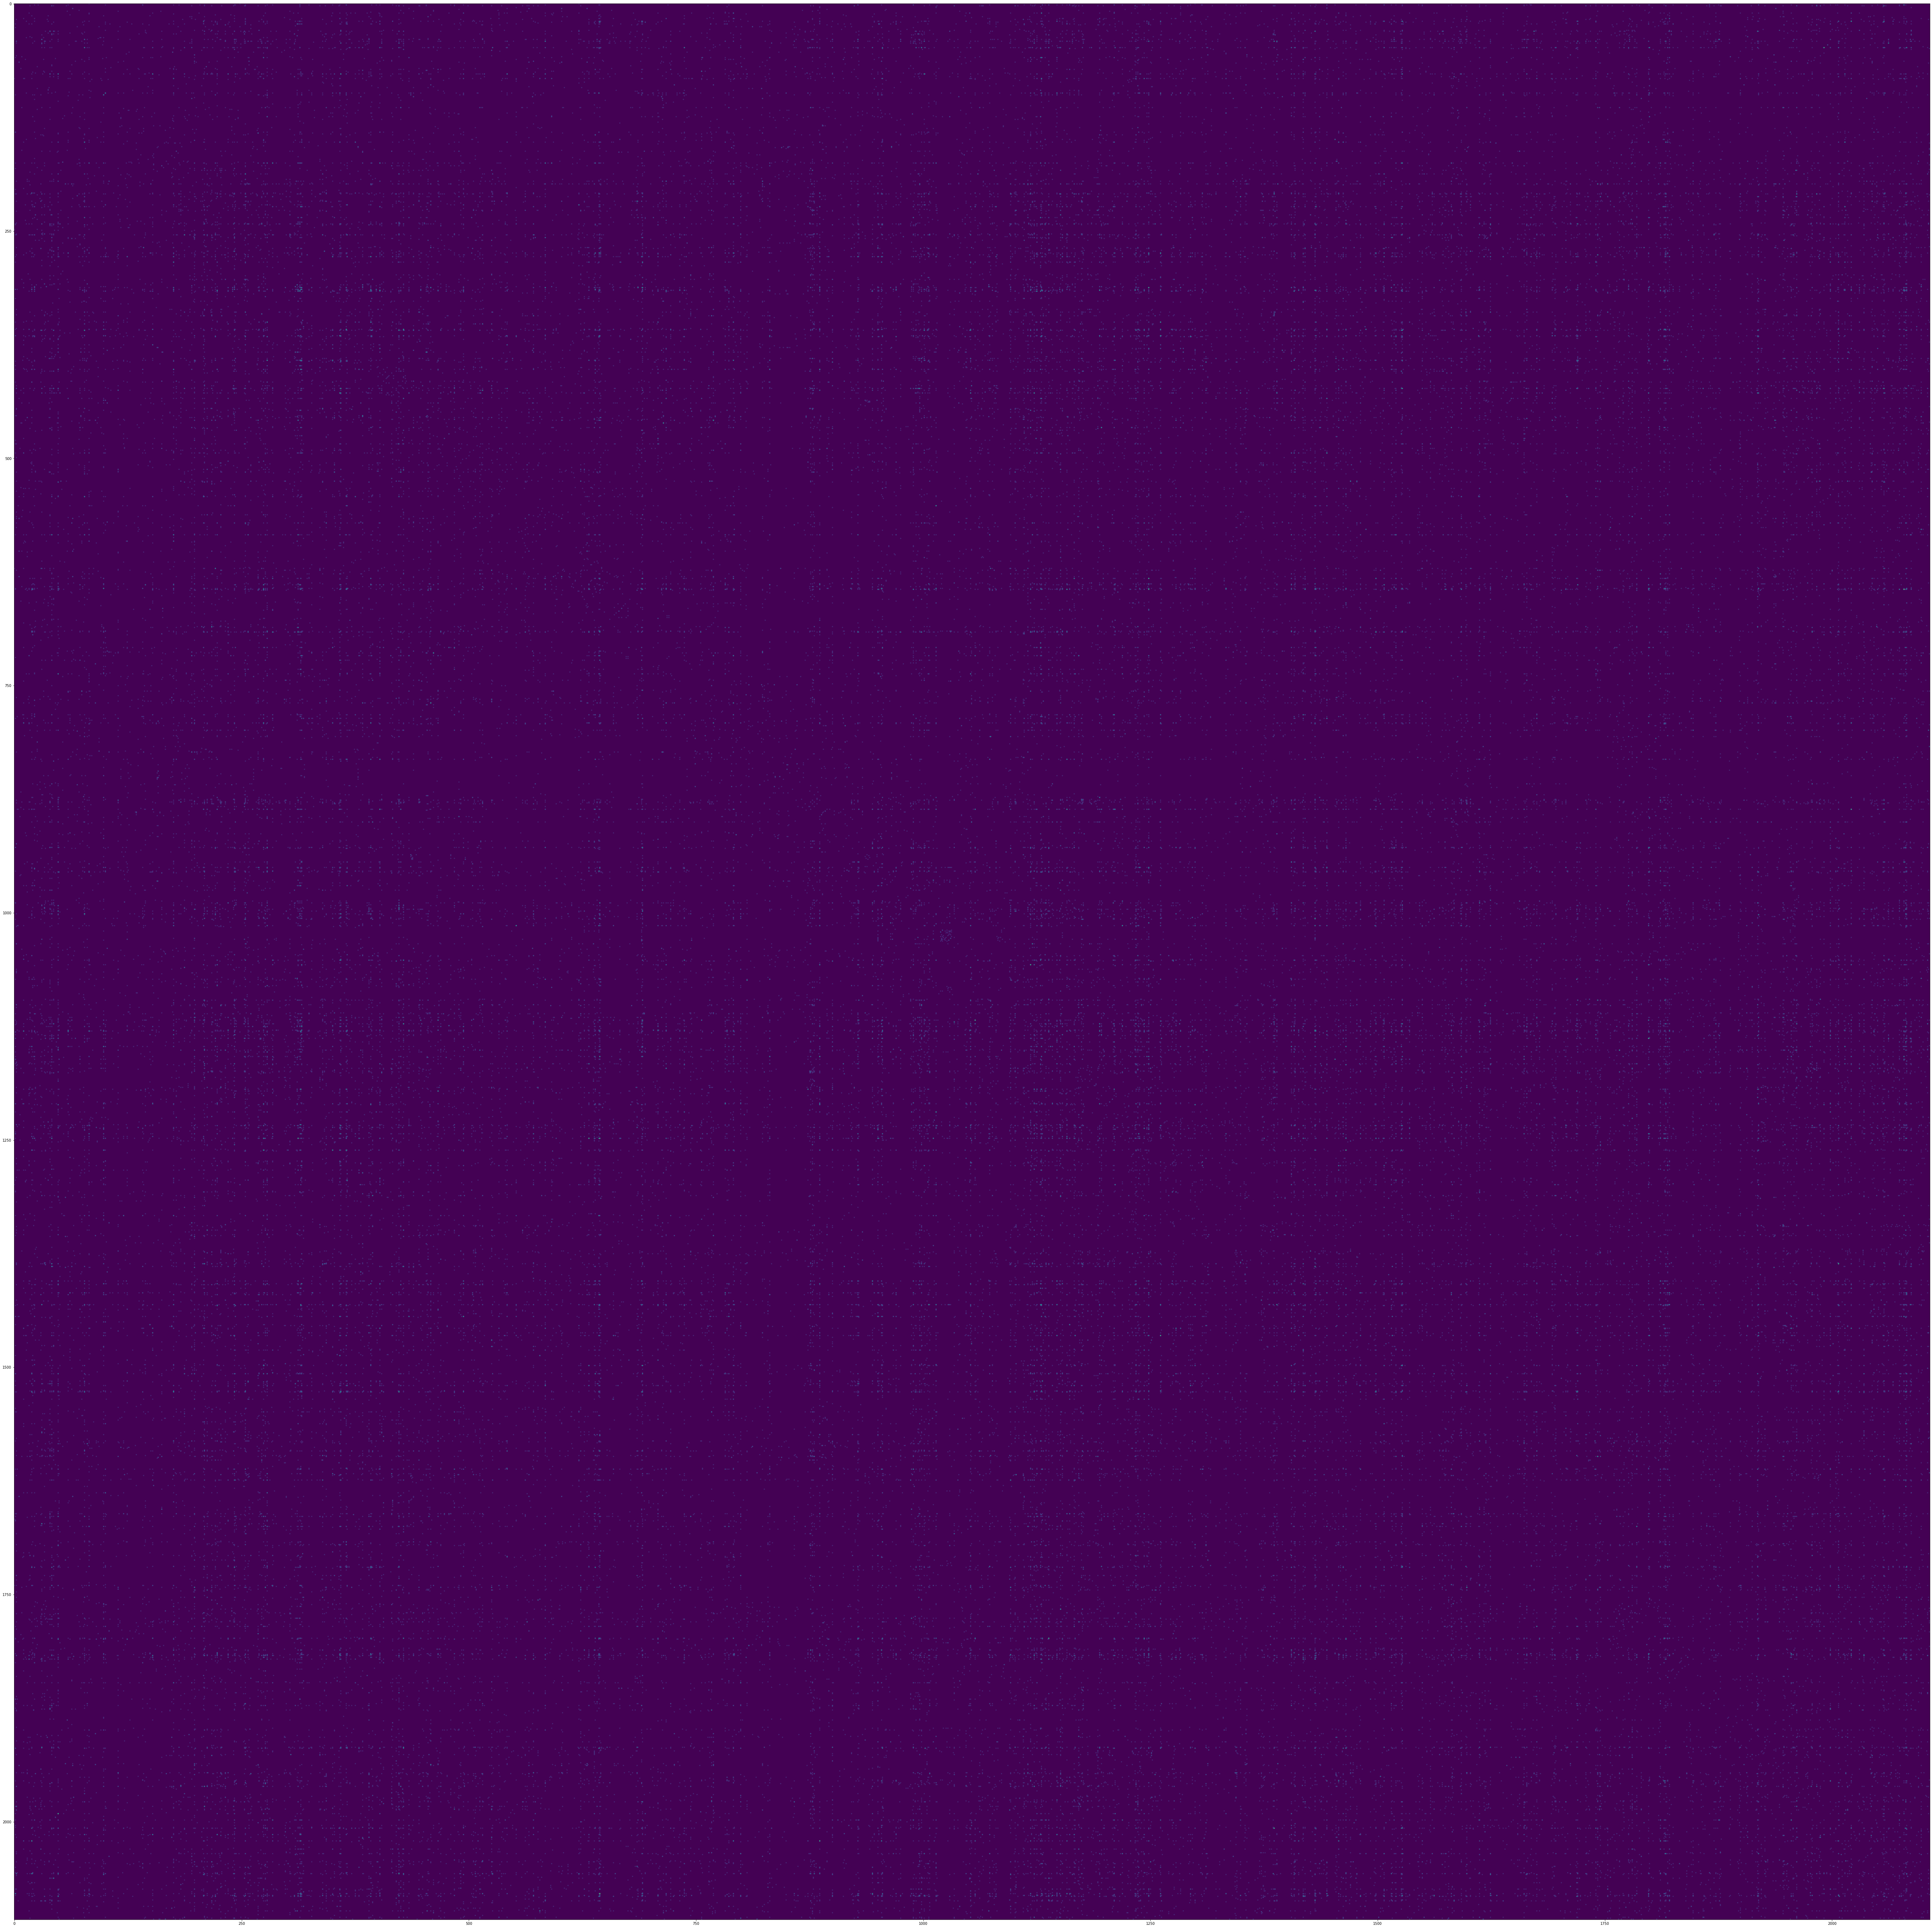

In [231]:
#hmm with all the data seems too sparse to really read...
fig, ax = plt.subplots(figsize=(100,100))
im = ax.imshow(bout_count)
# ax.set_xticks(np.arange(len(fencer_ID_list)))
# ax.set_yticks(np.arange(len(fencer_ID_list)))
plt.show()

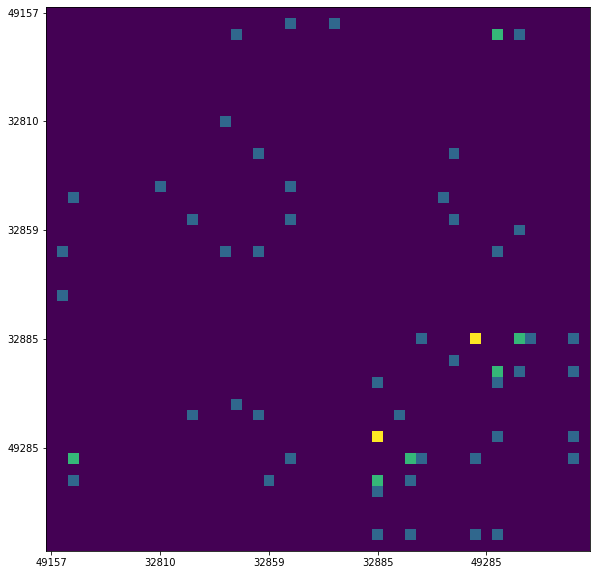

In [252]:
fig, ax = plt.subplots(figsize=(10,10))
num = 50
data = bout_count[0:num, 0:num]
im = ax.imshow(data)
ax.set_xticks(range(0, data.shape[0], num//5))
ax.set_yticks(range(0, data.shape[1], num//5))

ax.set_xticklabels(fencer_ID_list[0:num][::num//5])
ax.set_yticklabels(fencer_ID_list[0:num][::num//5])
plt.show()

In [260]:
np.max(bout_count) #most number of bouts between any two fencers 

7.0

## Count Properties

#### number of upsets vs total bouts


In [153]:
bout_df[bout_df['upset'] == True].shape[0]

9250

In [32]:
overall_upset_ratio = bout_df[bout_df['upset'] == True].shape[0]/bout_df.shape[0]
print("Overall percentage of Upset bouts: {:.2%}".format(overall_upset_ratio))

Overall percentage of Upset bouts: 18.83%


#### number of lefties/righties 

In [33]:
fencer_bio_df[fencer_bio_df['hand'] == 'Left'].shape[0]

360

In [34]:
fencer_bio_df[fencer_bio_df['hand'] == 'Right'].shape[0]

1760

In [37]:
total_handed = fencer_bio_df[(fencer_bio_df['hand'] == 'Left') | (fencer_bio_df['hand'] == 'Right')].shape[0]
overall_lefty_ratio = fencer_bio_df[fencer_bio_df['hand'] == 'Left'].shape[0] / total_handed
print("Overall percentage of left-handed fencerss: {:.2%}".format(overall_lefty_ratio))

Overall percentage of left-handed fencerss: 16.98%


#### upset ratio per fencer 

In [86]:
def get_fencer_upset_nums(fencer_id):
    fencer_bouts = bout_df[(bout_df['fencer_ID'] == fencer_id) | (bout_df['opp_ID'] == fencer_id)] 
    wins = fencer_bouts[fencer_bouts['winner_ID'] == fencer_id]
    losses = fencer_bouts[fencer_bouts['winner_ID'] != fencer_id]
    upset_wins       = wins[wins['upset'] == True].shape[0]
    non_upset_wins   = wins[wins['upset'] == False].shape[0]
    upset_losses     = losses[losses['upset'] == True].shape[0]
    non_upset_losses = losses[losses['upset'] == False].shape[0]
#     print("total bout count: {}".format(fencer_bouts.shape[0]))
#     print("upset_wins:       {}".format(upset_wins))
#     print("non_upset_wins:   {}".format(non_upset_wins))
#     print("upset_losses:     {}".format(upset_losses))
#     print("non_upset_losses: {}".format(non_upset_losses))
    return upset_wins, non_upset_wins, upset_losses, non_upset_losses
    
test_id = 28761
print(get_fencer_upset_nums(test_id))

(21, 12, 7, 53)


In [90]:
fencer_ID_list = list(set(list(np.unique(bout_df['fencer_ID'])) + list(np.unique(bout_df['opp_ID']))))

upset_data = []
for fencer_id in fencer_ID_list:
    upset_wins, non_upset_wins, upset_losses, non_upset_losses = get_fencer_upset_nums(fencer_id)
    total = upset_wins + non_upset_wins + upset_losses + non_upset_losses
    upset_data.append([fencer_id, total, upset_wins, non_upset_wins, upset_losses, non_upset_losses])

upset_df = pd.DataFrame(data=upset_data, columns = ['id', 'total bouts', 'upset_wins', 'non_upset_wins', 'upset_losses', 'non_upset_losses'])
upset_df.head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
0  49157            6           0               1             0   
1  16392          112           5              80            22   
2  40975          123           3              33             0   
3  16404           12           1               1             0   
4  24606            6           1               2             0   

   non_upset_losses  
0                 5  
1                 5  
2                87  
3                10  
4                 3

In [94]:
upset_df['total_wins'] = upset_df['upset_wins'] + upset_df['non_upset_wins']
upset_df['total_losses'] = upset_df['upset_losses'] + upset_df['non_upset_losses']

upset_df.head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
0  49157            6           0               1             0   
1  16392          112           5              80            22   
2  40975          123           3              33             0   
3  16404           12           1               1             0   
4  24606            6           1               2             0   

   non_upset_losses  total_wins  total_losses  
0                 5           1             5  
1                 5          85            27  
2                87          36            87  
3                10           2            10  
4                 3           3             3

In [96]:
upset_df['upset_wins_ratio'] = upset_df['upset_wins'] / upset_df['total_wins']
upset_df['upset_losses_ratio'] = upset_df['upset_losses'] / upset_df['total_losses']

upset_df.head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
0  49157            6           0               1             0   
1  16392          112           5              80            22   
2  40975          123           3              33             0   
3  16404           12           1               1             0   
4  24606            6           1               2             0   

   non_upset_losses  total_wins  total_losses  upset_wins_ratio  \
0                 5           1             5          0.000000   
1                 5          85            27          0.058824   
2                87          36            87          0.083333   
3                10           2            10          0.500000   
4                 3           3             3          0.333333   

   upset_losses_ratio  
0            0.000000  
1            0.814815  
2            0.000000  
3            0.000000  
4            0.000000

In [98]:
upset_df.sort_values(by=['total bouts'], ascending=False).head()

id  total bouts  upset_wins  non_upset_wins  upset_losses  \
1432  29852          440          41             181           101   
1249  20938          413          22             246            88   
1528  30327          381          19             265            67   
424   34549          369          29             135            65   
645   18774          368          39             196            83   

      non_upset_losses  total_wins  total_losses  upset_wins_ratio  \
1432               117         222           218          0.184685   
1249                57         268           145          0.082090   
1528                30         284            97          0.066901   
424                140         164           205          0.176829   
645                 50         235           133          0.165957   

      upset_losses_ratio  
1432            0.463303  
1249            0.606897  
1528            0.690722  
424             0.317073  
645             0.624060

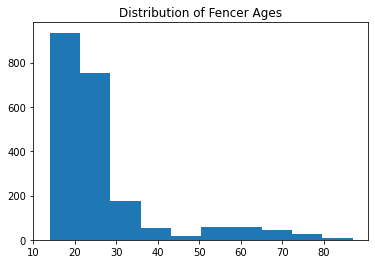

In [139]:
## Age distribution 
fig, ax = plt.subplots()
x = fencer_bio_df['age'].astype(int)
ax.hist(x)
plt.xticks(range(10, int(max(x))+1, 10))
ax.set_title("Distribution of Fencer Ages")
plt.show()

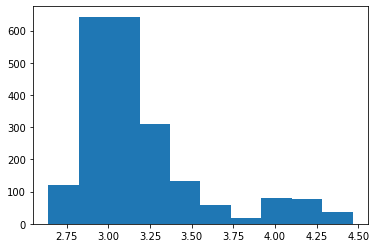

In [141]:
fig, ax = plt.subplots()
ax.hist(fencer_bio_df['age'].astype(int).map(math.log))
plt.show()

In [143]:
## Nationality
len(list(np.unique(fencer_bio_df['country'])))

103

In [149]:
fencer_bio_df.groupby('country').count().sort_values(by=['id'],ascending=False)


id  name  country_code  hand  age  url  date_accessed
country                                                                  
USA                133   133           133   133  133  133            133
ITALY              130   130           130   130  130  130            130
GERMANY            114   114           114   114  114  114            114
FRANCE              88    88            88    88   88   88             88
GREAT BRITAIN       87    87            87    87   87   87             87
...                ...   ...           ...   ...  ...  ...            ...
AS                   1     1             1     1    1    1              1
BS                   1     1             1     1    1    1              1
BRUNEI DARUSSALAM    1     1             1     1    1    1              1
SAUDI ARABIA         1     1             1     1    1    1              1
TESTING              1     1             1     1    1    1              1

[103 rows x 7 columns]

In [151]:
# poorly loaded country code! Need to fix in cache... 
fencer_bio_df[fencer_bio_df['country'] == 'TESTING']

id                name country_code  country   hand age  \
659  8941  LANGTON Marguerite          TST  TESTING  Right  75   

                               url        date_accessed  
659  https://fie.org/athletes/8941  2021-05-11 18:03:41

In [160]:
# these fencer's countries don't have a country code value in the dict? or the country label is the country code? 
fencer_bio_df[fencer_bio_df['country'].apply(lambda x: len(x)<3)]#.groupby('country_code').count()['id']

id                          name country_code country   hand age  \
408   47552                AUNG Phyu Phyu           MM      MM  Right  24   
409   47553                    SOE Nan Ei           MM      MM  Right  19   
1373  51548     MEJIA LOPEZ Angie Fabiola           HN      HN  Right  16   
1772  39056   LOPEZ FLORES Kateryn Gissel           HN      HN  Right  24   
1807  40178             ALBUAINAIN Sumaya           BH      BH  Right  19   
1808  40179                      ALI Muna           BH      BH  Right  24   
1809  40180                 FARDEEN Layla           BH      BH  Right  19   
1810  40181                 MOHAMED Maram           BH      BH  Right  19   
1915  46850                   LIANG Jenny           AS      AS  Right  18   
2034  41583                   CLARE Alana           BS      BS  Right  26   
2049  35497  ABEYNAYAKA Ashoka Udayangani           LK      LK  Right  32   
2093  44401               PRAKASHAM Reeta           LK      LK  Right  29   

                                 url        date_accessed  
408   https://fie.org/athletes/47552  2021-05-11 12:56:52  
409   https://fie.org/athletes/47553  2021-05-11 12:56:54  
1373  https://fie.org/athletes/51548  2021-05-12 13:37:34  
1772  https://fie.org/athletes/39056  2021-05-12 14:11:25  
1807  https://fie.org/athletes/40178  2021-05-12 14:12:55  
1808  https://fie.org/athletes/40179  2021-05-12 14:13:01  
1809  https://fie.org/athletes/40180  2021-05-12 14:13:04  
1810  https://fie.org/athletes/40181  2021-05-12 14:13:10  
1915  https://fie.org/athletes/46850  2021-05-12 14:25:15  
2034  https://fie.org/athletes/41583  2021-05-12 15:50:29  
2049  https://fie.org/athletes/35497  2021-05-12 15:51:07  
2093  https://fie.org/athletes/44401  2021-05-12 15:53:05

## Points Predictions

Based on points at the time of event, predicting the higher points to win (and 50-50 for unranked) probably has an expected accuracy of 82% (the 50-50 may be off, so could be worse than that).

## Bout Frequency 

In [214]:
fencer_ID_list = list(set(list(np.unique(bout_df['fencer_ID'])) + list(np.unique(bout_df['opp_ID']))))
bout_count = np.zeros((len(fencer_ID_list),len(fencer_ID_list)))
for row in range(0, bout_df.shape[0]):
    id1 = bout_df.iloc[row]['fencer_ID']
    idx1 = fencer_ID_list.index(id1) 
    id2 = bout_df.iloc[row]['opp_ID']
    idx2 = fencer_ID_list.index(id2) 

    bout_count[idx1][idx2] += 1
    bout_count[idx2][idx1] += 1

In [189]:
bout_count.sum() # = 2* bout_df.shape[0]

98262.0

In [213]:
bout_df.shape[0]

49131

In [215]:
np.count_nonzero(bout_count) #represent instances where we have bout data between the two fencers 

84114

In [217]:
bout_count.size - np.count_nonzero(bout_count)

4359550

In [262]:
print("Percentage of pairs where we have data: {:.2%}".format(np.count_nonzero(bout_count) / bout_count.size))

Percentage of pairs where we have data: 1.89%


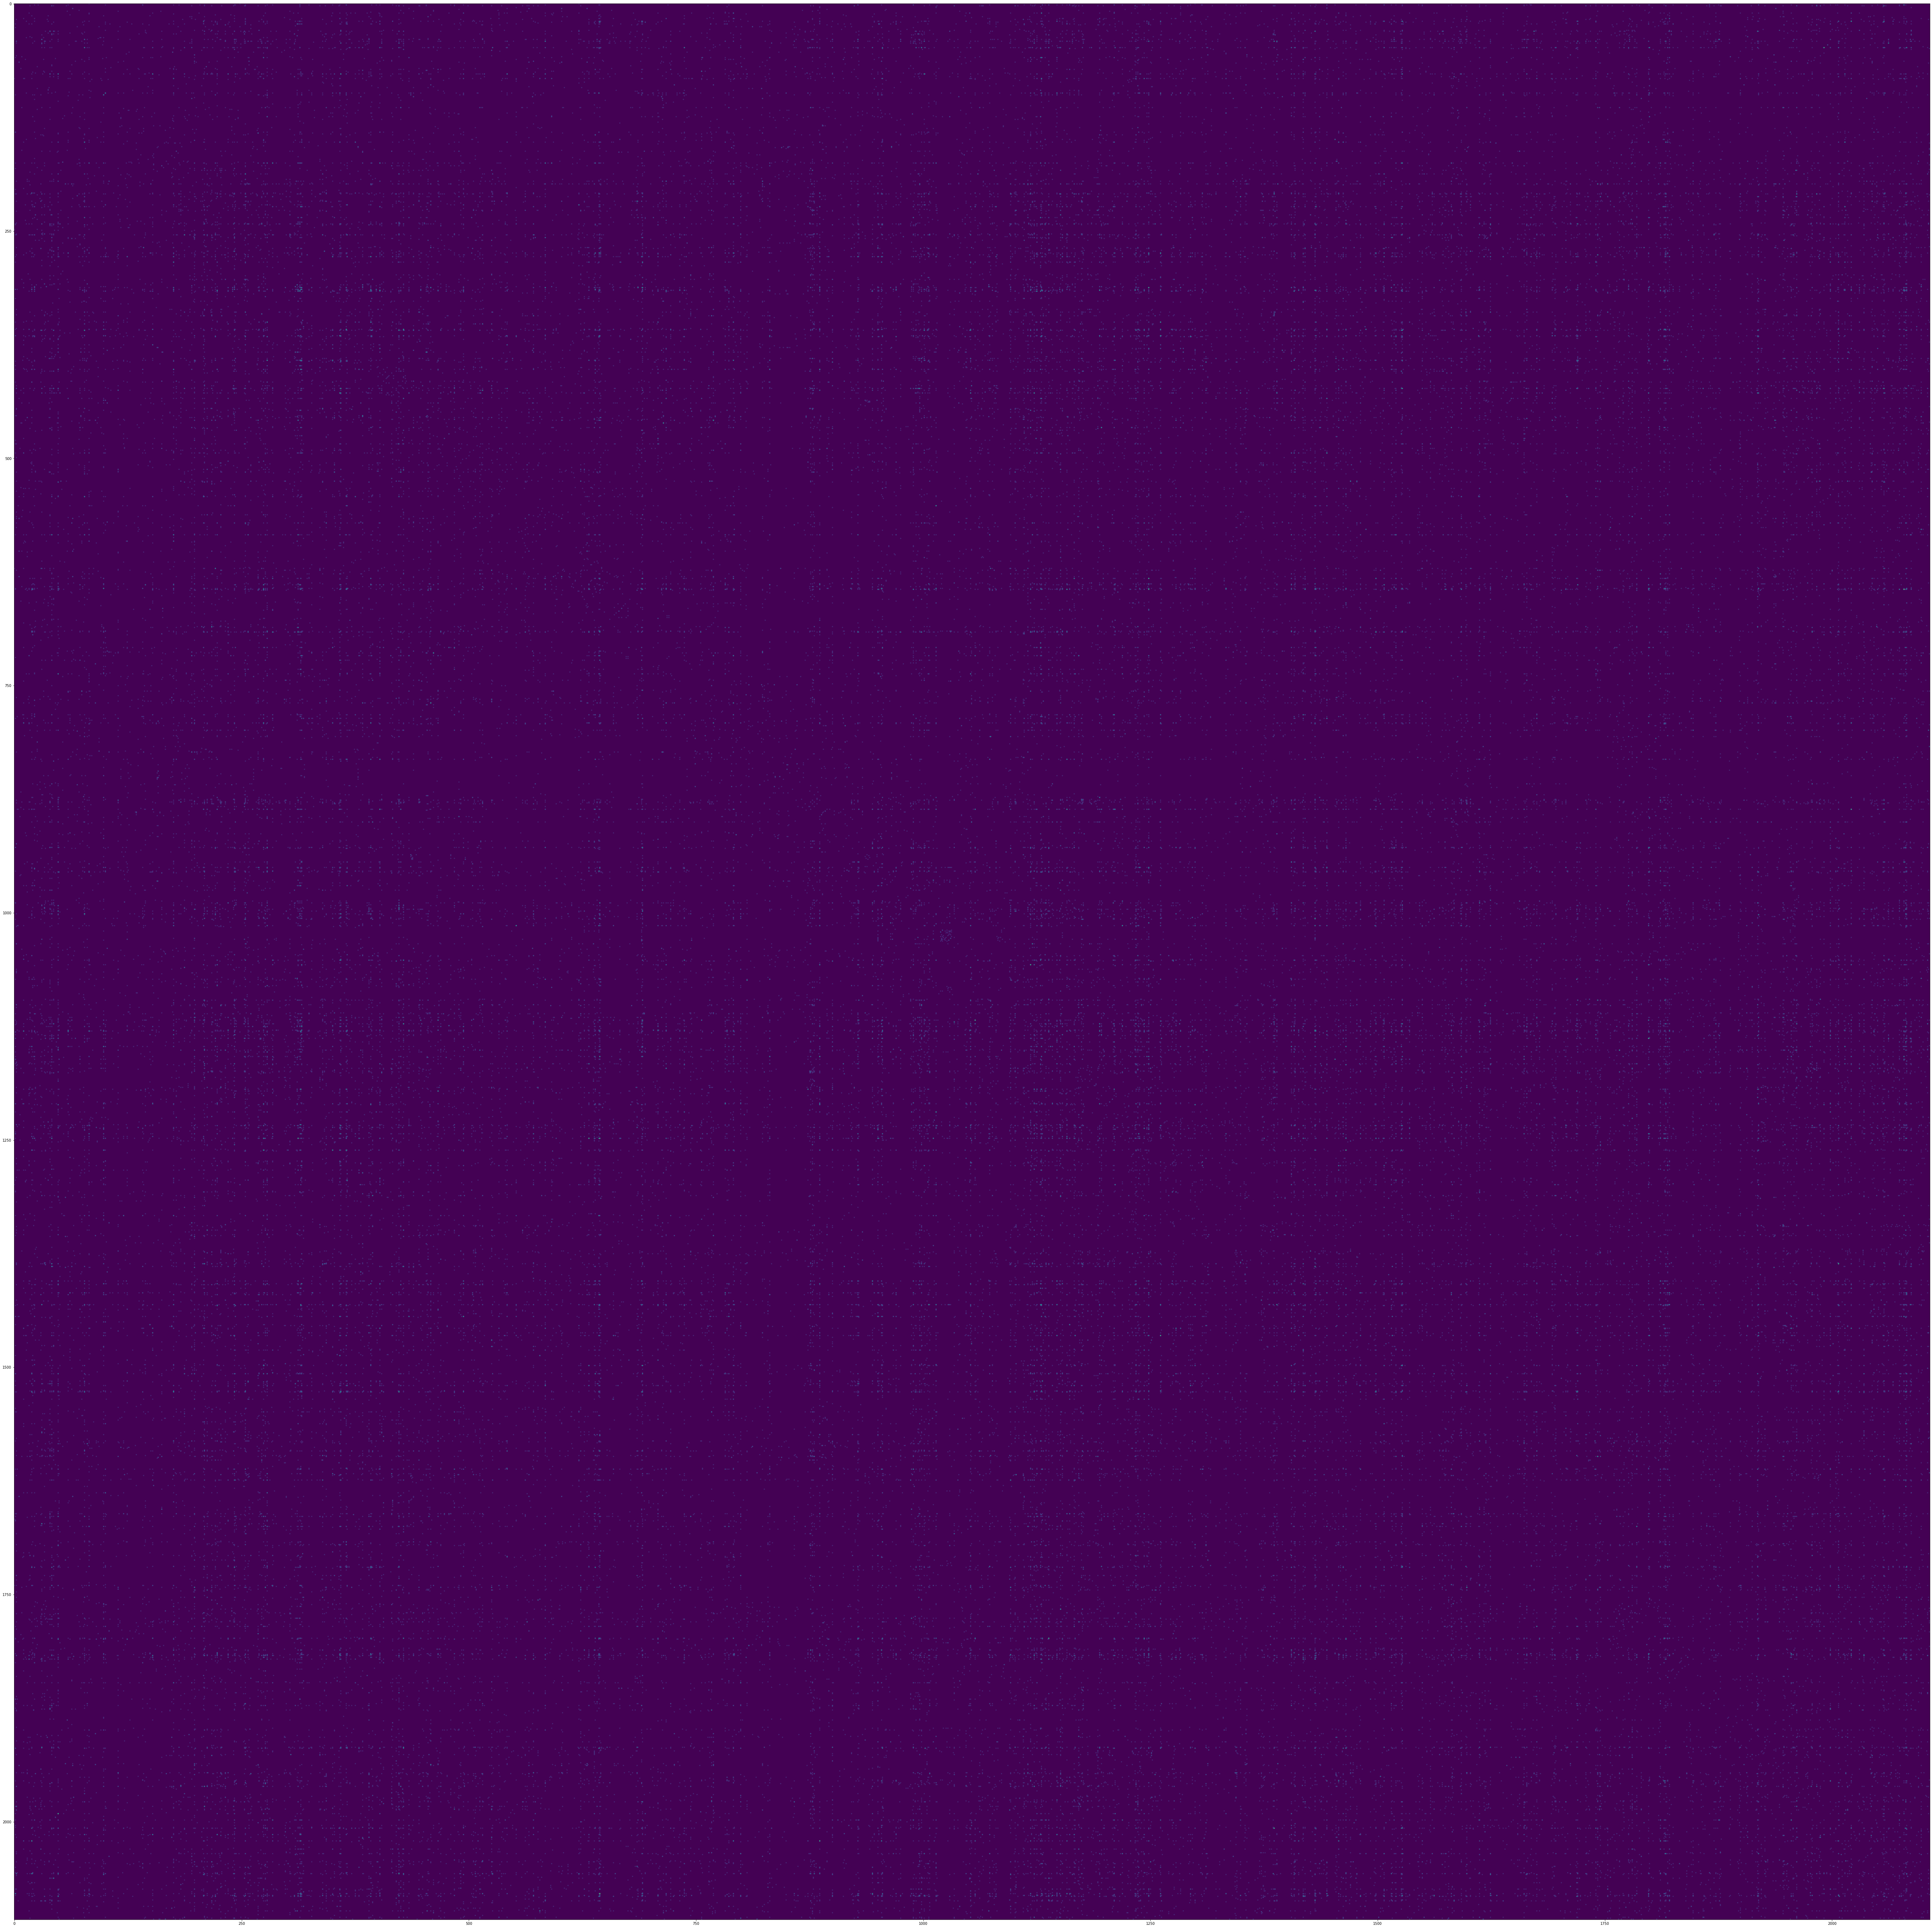

In [231]:
#hmm with all the data seems too sparse to really read...
fig, ax = plt.subplots(figsize=(100,100))
im = ax.imshow(bout_count)
# ax.set_xticks(np.arange(len(fencer_ID_list)))
# ax.set_yticks(np.arange(len(fencer_ID_list)))
plt.show()

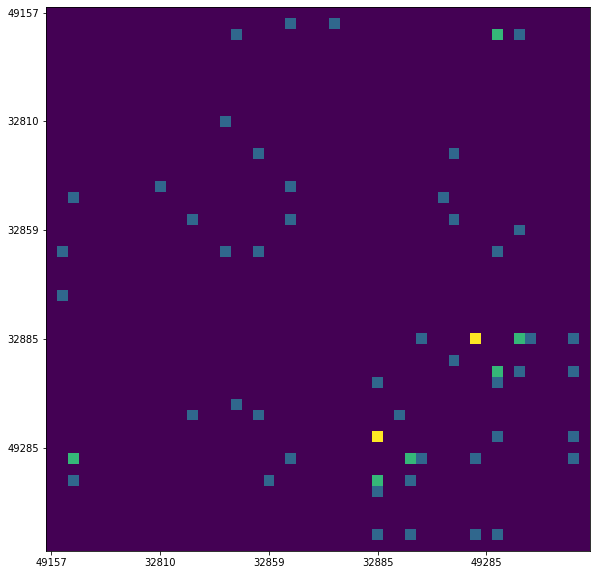

In [252]:
fig, ax = plt.subplots(figsize=(10,10))
num = 50
data = bout_count[0:num, 0:num]
im = ax.imshow(data)
ax.set_xticks(range(0, data.shape[0], num//5))
ax.set_yticks(range(0, data.shape[1], num//5))

ax.set_xticklabels(fencer_ID_list[0:num][::num//5])
ax.set_yticklabels(fencer_ID_list[0:num][::num//5])
plt.show()

In [260]:
np.max(bout_count) #most number of bouts between any two fencers 

7.0